In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit

from tensorflow.keras import Sequential, layers, utils, losses
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from keras.utils.vis_utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('drive') 

Mounted at drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/combined_df.csv')
df['return'] = np.exp(df['log_price_change'])
df

,Unnamed: 0,Week,Open,High,Low,Close,Adj Close,Volume,log_Price,log_price_change,Number_of_Jumps,Score,return,vol
0,0,2010-01-04/2010-01-10,30.393929,30.529287,30.075357,30.282500,25.813346,2078806800,7.458292,-0.005054,1,0.050072,0.994959,0.005054
1,1,2010-01-11/2010-01-17,37.532143,37.705715,36.923572,37.280000,31.778138,2689542800,9.246531,-0.015545,3,-0.018721,0.984575,0.015545
2,2,2010-01-18/2010-01-24,30.075000,30.412499,29.325358,29.735357,25.346950,2832082400,7.383482,-0.021589,4,0.030548,0.978642,0.021589
3,3,2010-01-25/2010-01-31,36.475715,37.024642,35.401786,36.008572,30.694354,7074832800,9.071252,-0.015768,4,0.126954,0.984355,0.015768
4,4,2010-02-01/2010-02-07,34.743214,35.246072,34.340000,34.904643,29.753338,3671505600,8.917170,0.010228,4,0.123942,1.010281,0.010228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,660,2022-08-29/2022-09-04,799.979996,804.819992,784.320007,791.280014,789.969574,390399000,25.312438,-0.009630,0,0.012074,0.990417,0.009630
661,661,2022-09-05/2022-09-11,621.400009,627.940002,614.729996,622.320007,621.289383,314117000,20.181893,0.001984,0,0.036968,1.001986,0.001984
662,662,2022-09-12/2022-09-18,780.139984,788.490005,766.029999,775.649979,774.365402,568337900,25.211036,-0.008491,2,0.066218,0.991545,0.008491
663,663,2022-09-19/2022-09-25,763.619995,777.320007,755.250015,768.269989,766.997635,473543200,25.164753,-0.000327,0,0.102698,0.999673,0.000327


In [ ]:
test = df[['Week','Adj Close']]
price = test['Adj Close'].iloc[536:-1]

In [ ]:
price

536    347.191910
537    338.643600
538    351.642876
539    369.738571
540    381.881004
          ...    
659    834.595520
660    789.969574
661    621.289383
662    774.365402
663    766.997635
Name: Adj Close, Length: 128, dtype: float64

In [ ]:
price = price.tolist()

# Econometrics Examination

In [ ]:
df_econo = df[['return','log_price_change','Score']]

In [ ]:
n_obs = 10
df_train, df_test = df_econo[0:-n_obs], df_econo[-n_obs:]

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print('the Null Hypothesis (H0): Series data is not stationary')
print('the Alternative Hypothesis (H1): Series data is stationary\n')
        
print('ADF Test: log_price_change time series')
adf_test(df_train['log_price_change'])

print('ADF Test: Sentiment Score time series')
adf_test(df_train['Score'])

the Null Hypothesis (H0): Series data is not stationary
the Alternative Hypothesis (H1): Series data is stationary

ADF Test: log_price_change time series
ADF Statistics: -27.987659
p-value: 0.000000
Critical values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
ADF Test: Sentiment Score time series
ADF Statistics: -4.912355
p-value: 0.000033
Critical values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [ ]:
df_train['Score_diff'] = df_train['Score'].diff().dropna()

<ipython-input-9-60dd2708c085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Score_diff'] = df_train['Score'].diff().dropna()


In [ ]:
df_train.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_train

,return,log_price_change,Score,Score_diff
1,0.984575,-0.015545,-0.018721,-0.068793
2,0.978642,-0.021589,0.030548,0.049269
3,0.984355,-0.015768,0.126954,0.096406
4,1.010281,0.010228,0.123942,-0.003012
5,1.014032,0.013935,0.049399,-0.074543
...,...,...,...,...
650,1.015212,0.015098,0.079701,0.046340
651,0.996103,-0.003904,0.008363,-0.071338
652,1.011527,0.011461,0.018525,0.010162
653,1.004240,0.004231,0.086554,0.068029


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=20
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_train, variables = df_train.columns)

,return_x,log_price_change_x,Score_x,Score_diff_x
return_y,1.0000,0.0000,0.0743,0.0682
log_price_change_y,0.0000,1.0000,0.0750,0.0661
Score_y,0.1948,0.2050,1.0000,0.0170
Score_diff_y,0.3202,0.3078,0.0000,1.0000


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
vix = yf.download(tickers='^VIX', start="2010-01-04", end="2022-10-02", interval='1wk')
aapl_week = yf.download(tickers='AAPL', start="2010-01-04", end="2022-10-02", interval='1wk')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
aapl_week

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.699643,7.466071,7.570714,6.453412,2.572536e+09
2010-01-11,7.600000,7.607143,7.289286,7.354643,6.269229,2.689543e+09
2010-01-18,7.440357,7.698214,7.041429,7.062500,6.020201,2.832082e+09
2010-01-25,7.232500,7.632500,6.794643,6.859286,5.846979,7.074833e+09
2010-02-01,6.870357,7.150000,6.816071,6.980714,5.950485,3.671506e+09
...,...,...,...,...,...,...
2022-08-29,161.149994,162.899994,154.669998,155.809998,155.551956,3.903990e+08
2022-09-05,156.470001,157.820007,152.679993,157.369995,157.109375,3.141170e+08
2022-09-12,159.589996,164.259995,148.369995,150.699997,150.450424,5.683379e+08


In [ ]:
df['VIX'] = (vix['Adj Close']).tolist()

In [ ]:
df['Adj Close'] = aapl_week['Adj Close'].tolist()
df['Volume'] = aapl_week['Volume'].tolist()

In [ ]:
df

,Unnamed: 0,Week,Open,High,Low,Close,Adj Close,Volume,log_Price,log_price_change,Number_of_Jumps,Score,return,vol,VIX
0,0,2010-01-04/2010-01-10,30.393929,30.529287,30.075357,30.282500,6.453412,2.572536e+09,7.458292,-0.005054,1,0.050072,0.994959,0.005054,18.129999
1,1,2010-01-11/2010-01-17,37.532143,37.705715,36.923572,37.280000,6.269229,2.689543e+09,9.246531,-0.015545,3,-0.018721,0.984575,0.015545,17.910000
2,2,2010-01-18/2010-01-24,30.075000,30.412499,29.325358,29.735357,6.020201,2.832082e+09,7.383482,-0.021589,4,0.030548,0.978642,0.021589,27.309999
3,3,2010-01-25/2010-01-31,36.475715,37.024642,35.401786,36.008572,5.846979,7.074833e+09,9.071252,-0.015768,4,0.126954,0.984355,0.015768,24.620001
4,4,2010-02-01/2010-02-07,34.743214,35.246072,34.340000,34.904643,5.950485,3.671506e+09,8.917170,0.010228,4,0.123942,1.010281,0.010228,26.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,660,2022-08-29/2022-09-04,799.979996,804.819992,784.320007,791.280014,155.551956,3.903990e+08,25.312438,-0.009630,0,0.012074,0.990417,0.009630,25.469999
661,661,2022-09-05/2022-09-11,621.400009,627.940002,614.729996,622.320007,157.109375,3.141170e+08,20.181893,0.001984,0,0.036968,1.001986,0.001984,22.790001
662,662,2022-09-12/2022-09-18,780.139984,788.490005,766.029999,775.649979,150.450424,5.683379e+08,25.211036,-0.008491,2,0.066218,0.991545,0.008491,26.299999
663,663,2022-09-19/2022-09-25,763.619995,777.320007,755.250015,768.269989,150.180862,4.735432e+08,25.164753,-0.000327,0,0.102698,0.999673,0.000327,29.920000


## Prepare Data

In [ ]:
result_df = df[['Week']].iloc[-128:]

In [ ]:
result_df

,Week
537,2020-04-20/2020-04-26
538,2020-04-27/2020-05-03
539,2020-05-04/2020-05-10
540,2020-05-11/2020-05-17
541,2020-05-18/2020-05-24
...,...
660,2022-08-29/2022-09-04
661,2022-09-05/2022-09-11
662,2022-09-12/2022-09-18
663,2022-09-19/2022-09-25


In [ ]:
(37.705715-36.923572)

0.7821429999999978

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def regression_metrics_by_sklearn(y_true, y_pred):
    print('========calculate regression metrics by sklearn========')
    print('MSE: {:.10f}'.format(mean_squared_error(y_true, y_pred)))
    print('MAE: {:.10f}'.format(mean_absolute_error(y_true, y_pred)))
    print('MAPE: {:.10f}'.format(mean_absolute_percentage_error(y_true, y_pred)))
    #print('r2: {:.10f}'.format(r2_score(y_true, y_pred, )))

In [ ]:
def create_new_set(X, y, timestep, time_lag=1):
    features = []
    target = []
    
    for i in range(0, len(X)-timestep-time_lag,1):
        data = X[i:i+timestep]
        label = y[i+timestep+time_lag]
        features.append(data)
        target.append(label)
        
    return np.array(features), np.array(target)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


def classifier_metrics_by_sklearn(y_true, y_pred):
    print('accuracy_score: {:.10f}'.format(accuracy_score(y_true, y_pred)))
    #print('precision_score: {:.10f}'.format(precision_score(y_true, y_pred)))
    print('recall_score: {:.10f}'.format(recall_score(y_true, y_pred)))
    print('f1_score: {:.2f}'.format(f1_score(y_true, y_pred)))

## Number of Jumps

In [ ]:
minMaxScaler_x = MinMaxScaler()
standardScaler = StandardScaler()
#selected = ['Adj Close','Volume','Score']
selected = ['Adj Close','Volume','Score', 'return','Number_of_Jumps']
X = standardScaler.fit_transform(df[selected])  

In [ ]:
y_selected = ['Number_of_Jumps']

y = np.array(df[y_selected])
y[0]

array([1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

((532, 5), (133, 5), (532, 1), (133, 1))

In [ ]:
tp = 4  
train_dataset, train_labels = create_new_set(X_train, y_train, timestep=tp)
test_dataset, test_labels = create_new_set(X_test, y_test, timestep=tp)   
test_dataset.shape

(128, 4, 5)

In [ ]:
model_1 = Sequential([
    layers.LSTM(units=200, input_shape=(4, 5
                                        
                                        ), return_sequences=True, activation='tanh'),
    layers.Dropout(0.2),
    layers.LSTM(units=300, return_sequences=False),
    #layers.LSTM(units=32),
    layers.Dropout(0.2),
    layers.Dense(1, activation='relu')
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss=['mse'])

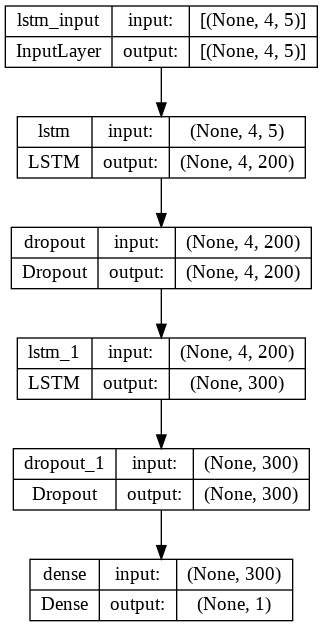

In [ ]:
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model_1, to_file='graph.png', show_shapes=True)

In [ ]:
his = model_1.fit(train_dataset, train_labels,
                batch_size = 42,
               epochs=100,
               validation_data= (test_dataset, test_labels),
               )

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(his.history['loss'],label='Train loss')
plt.plot(his.history['val_loss'],label='Val loss')
plt.legend(loc='best')

In [ ]:
test_preds = model_1.predict(test_dataset,verbose=1)
test_preds = test_preds[:,0]

In [ ]:
k = []
for i in test_preds:
  if i - int(i) >= 0.5:
    i = int(i+1)
  else:
    i = int(i)
  k.append(i-1 if i >0 else i)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(test_preds)),k,label='Predict')
plt.scatter(range(len(test_preds)),test_labels, label='Real')
plt.ylabel('Jumps in a Week')
plt.xlabel('Weeks')
plt.legend()
plt.title('Number of Jumps')

In [ ]:
result_df['Jumps'] = test_preds

In [ ]:
regression_metrics_by_sklearn(test_labels, k)

## Retuern

In [ ]:
minMaxScaler_x = MinMaxScaler()
standardScaler = StandardScaler()
selected = ['Adj Close', 'Score', 'log_price_change']
#selected = ['Adj Close','Volume','Score', 'return','Number_of_Jumps']
X = standardScaler.fit_transform(df[selected])

In [ ]:
y_selected = ['return']

y = np.array(df[y_selected])
y[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
tp = 4
train_dataset, train_labels = create_new_set(X_train, y_train, timestep=tp)
test_dataset, test_labels = create_new_set(X_test, y_test, timestep=tp)
test_dataset.shape

In [ ]:
model_2 = Sequential([
    layers.LSTM(units=200, input_shape=(4, 3), return_sequences=True, activation='tanh'),
    layers.Dropout(0.2),
    layers.LSTM(units=300, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(units=32, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(1, activation='relu')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=['mse'])

In [ ]:
his = model_2.fit(train_dataset, train_labels,
                batch_size = 42,
               epochs=200,
               validation_data= (test_dataset, test_labels),
               )

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(his.history['loss'],label='Train loss')
plt.plot(his.history['val_loss'],label='Val loss')
plt.legend(loc='best')

In [ ]:
test_preds = model_2.predict(test_dataset,verbose=1)
test_preds = test_preds[:,0]

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(test_preds)),test_preds,label='Predict')
plt.scatter(range(len(test_preds)),test_labels, label='Real')
plt.ylabel('Return')
plt.xlabel('Weeks')
plt.legend()
plt.title('Returns')

In [ ]:
result_df['Return'] = test_preds

In [ ]:
regression_metrics_by_sklearn(test_labels, test_preds)

## Volitality

In [ ]:
minMaxScaler_x = MinMaxScaler()
standardScaler = StandardScaler()  
selected = ['Adj Close','VIX','vol', 'return']
#selected = ['Adj Close','Volume','Score', 'return','Number_of_Jumps']
X = standardScaler.fit_transform(df[selected])

In [ ]:
y_selected = ['vol']

y = np.array(df[y_selected])
y[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape  

In [ ]:
tp = 4
train_dataset, train_labels = create_new_set(X_train, y_train, timestep=tp)
test_dataset, test_labels = create_new_set(X_test, y_test, timestep=tp)
test_dataset.shape

In [ ]:
model_3 = Sequential([
    layers.LSTM(units=200, input_shape=(4, 4), return_sequences=True, activation='tanh'),
    layers.Dropout(0.2),
    layers.LSTM(units=300, return_sequences=False),
    #layers.LSTM(units=32),
    layers.Dropout(0.2),
    layers.Dense(1, activation='relu')
])

model_3.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
             loss=['msle'])

In [ ]:
his = model_3.fit(train_dataset, train_labels,
                batch_size = 42,
               epochs=100,
               validation_data= (test_dataset, test_labels),
               )

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(his.history['loss'],label='Train loss')
plt.plot(his.history['val_loss'],label='Val loss')
plt.legend(loc='best')

In [ ]:
test_preds = model_3.predict(test_dataset,verbose=1)
test_preds = test_preds[:,0]

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(test_preds)),test_preds,label='Predict')
plt.scatter(range(len(test_preds)),test_labels, label='Real')
plt.ylabel('Volitility')
plt.xlabel('Weeks')
plt.legend()
plt.title('Volitility Changes')

In [ ]:
result_df['Vol'] = test_preds

In [ ]:
test_labels-test_preds

In [ ]:
regression_metrics_by_sklearn(test_labels, test_preds)

In [ ]:
result_df

In [ ]:
#result_df.to_csv('model_prediction_res.csv')     
!cp model_prediction_res.csv "drive/My Drive/"   

In [ ]:
#res.to_csv('model_prediction_res.csv')
#!cp model_prediction_res.csv "drive/My Drive/"